In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
alt.renderers.enable("notebook")

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

In [35]:
df_path = "/Users/nvvankad/Documents/new_laptop/Personal/Masters/csce 5222 Feature Engineering/extract_dataset.csv"
df = pd.read_csv(df_path)

In [36]:
df = df[['Content','Category']]

In [37]:
df.head()

Content         Category
0  The Tempe Police Department said it was invest...  Autonomous Cars
1  On Sunday, the inevitable happened: An autonom...  Autonomous Cars
2  Even before a driverless Uber vehicle struck a...  Autonomous Cars
3  On Sunday night, a woman died after she was hi...  Autonomous Cars
4  A self-driving vehicle made by Uber has struck...  Autonomous Cars

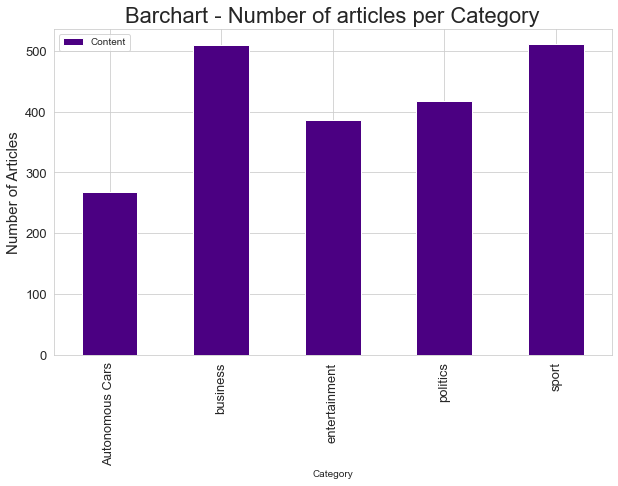

In [39]:
df_print = df.groupby(['Category']).count()

ax = df_print.plot(kind='bar', figsize=(10,6), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Barchart - Number of articles per Category", fontsize=22)
ax.set_ylabel("Number of Articles", fontsize=15);
plt.show()

In [74]:
print(df.count().Category)

2091


In [70]:
df_print

Content
Category                
Autonomous Cars      267
business             510
entertainment        386
politics             417
sport                511

In [84]:

# loading dataset

df_path = "/Users/nvvankad/Documents/new_laptop/Personal/Masters/csce 5222 Feature Engineering/extract_dataset.csv"

df = pd.read_csv(df_path)

# Number of articles in each category

bars = alt.Chart(df).mark_bar(size=50).encode(
    x=alt.X("Category"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of articles')),
    tooltip=[alt.Tooltip('count()', title='Number of articles'), 'Category'],
    color='Category'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Number of articles in each category",
)




#### News length by category

* Definition of news length field. Although there are special characters in the text (\r, \n), it will be useful as an approximation

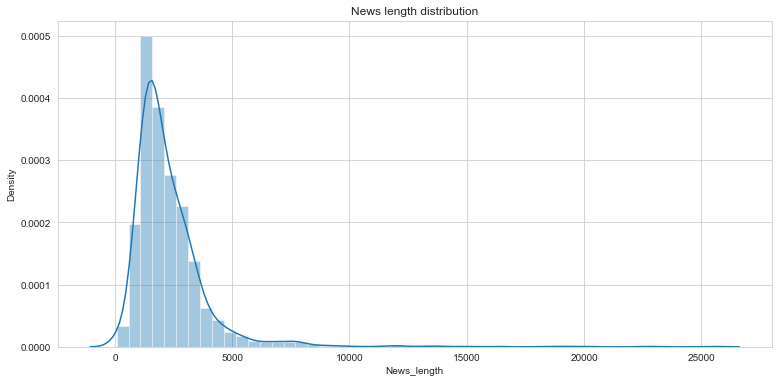

In [41]:
df['News_length'] = df['Content'].str.len()
plt.figure(figsize=(12.8,6))
sns.distplot(df['News_length']).set_title('News length distribution');


In [42]:
df['News_length'].describe()


count     2091.000000
mean      2313.283596
std       1744.760566
min         75.000000
25%       1376.500000
50%       1882.000000
75%       2807.000000
max      25484.000000
Name: News_length, dtype: float64

In [46]:

quantile_95 = df['News_length'].quantile(0.95)
df_95 = df[df['News_length'] < quantile_95]

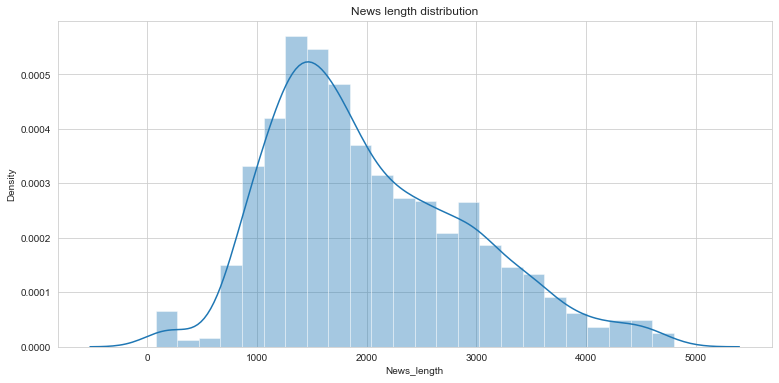

In [47]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['News_length']).set_title('News length distribution');

In [43]:
df_more10k = df[df['News_length'] > 10000]
len(df_more10k)

15

In [44]:
df_more10k['Content'].iloc[14]

'Minimum wage increased to Â£5.05\n\nThe minimum wage will rise in October, benefiting more than 1m people, the government has announced.\n\nAdults must be paid at least Â£5.05 an hour, up from Â£4.85, while 18 to 21 year olds will be paid Â£4.25. The recommendations came from the Low Pay Commission which said the number of jobs had continued to grow since the minimum wage was introduced in 1999. Businesses wanted it frozen, warning more rises could damage competitiveness but the unions want a Â£6 rate.\n\nA further increase in the adult rate to Â£5.35 an hour is provisionally scheduled for October 2006. According to the commission, many businesses had found the last two significant increases in the minimum wage "challenging". "We have therefore recommended only a slight increase above average earnings, and concentrated it in the second year to allow business more time to absorb the impact," said chairman Adair Turner. The government says most of those on the minimum wage are women - w

##### Boxplot

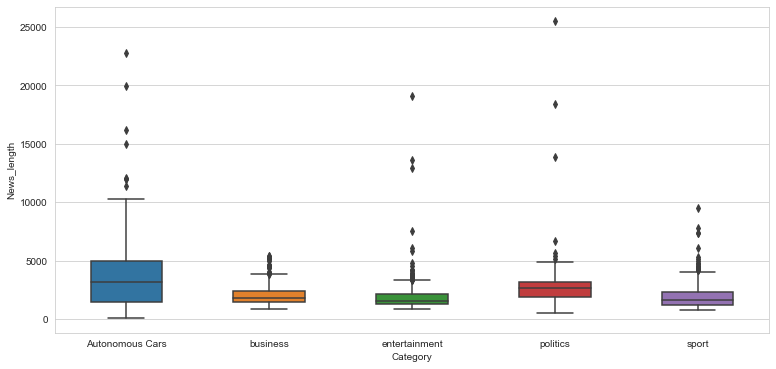

In [45]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='Category', y='News_length', width=.5);

#### Now, let's remove the larger documents for better comprehension:


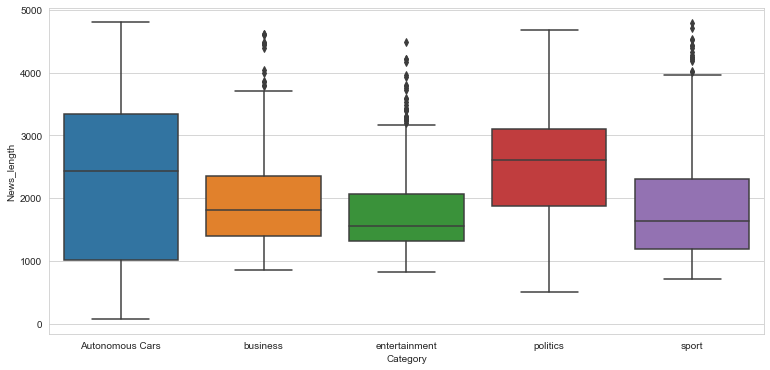

In [48]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='Category', y='News_length');

We can see that, although the length distribution is different for every category, the difference is not too big. If we had way too different lengths between categories we would have a problem since the feature creation process may take into account counts of words. However, when creating the features with TF-IDF scoring, we will normalize the features just to avoid this.

At this point, we cannot do further Exploratory Data Analysis. We'll turn onto the Feature Engineering section.

We'll save the dataset:

In [49]:
with open('News_dataset.pickle', 'wb') as output:
    pickle.dump(df, output)